In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv(r'C:\Users\asus\Desktop\Kaggle datset\Books dataset\Train.csv')

In [3]:
df_train.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


In [4]:
df_train.isnull().sum().sort_values(ascending=False)

SalesInMillions    0
USER_POINTS        0
CRITICS_POINTS     0
RATING             0
PUBLISHER          0
CATEGORY           0
YEAR               0
CONSOLE            0
ID                 0
dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3506 entries, 0 to 3505
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3506 non-null   int64  
 1   CONSOLE          3506 non-null   object 
 2   YEAR             3506 non-null   int64  
 3   CATEGORY         3506 non-null   object 
 4   PUBLISHER        3506 non-null   object 
 5   RATING           3506 non-null   object 
 6   CRITICS_POINTS   3506 non-null   float64
 7   USER_POINTS      3506 non-null   float64
 8   SalesInMillions  3506 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 246.6+ KB


In [14]:
df_train.describe()

,YEAR,CRITICS_POINTS,USER_POINTS,SalesInMillions
count,3506.000000,3506.000000,3506.000000,3506.000000
mean,2008.990302,3.790831,0.405824,2.171021
std,4.304252,3.141781,0.455541,2.495396
min,1997.000000,0.568966,0.000341,0.001524
25%,2006.000000,1.738095,0.065966,0.965679
50%,2009.000000,2.766667,0.233333,1.866140
75%,2012.000000,4.621528,0.598333,2.792029
max,2019.000000,23.250000,2.325000,84.226041


In [6]:
df_train = df_train.drop(['ID'], 1)

In [7]:
df_train.YEAR.unique()

array([2008, 2012, 2019, 2002, 2013, 2004, 2014, 2016, 2010, 2006, 2007,
       2011, 2003, 2001, 2015, 2009, 2000, 2005, 2017, 1999, 2018, 1998,
       1997], dtype=int64)

In [76]:
df = df_train.copy()

In [77]:
df['YEAR'] = df['YEAR'] - 1990

In [78]:
df['YEAR'].unique()

array([18, 22, 29, 12, 23, 14, 24, 26, 20, 16, 17, 21, 13, 11, 25, 19, 10,
       15, 27,  9, 28,  8,  7], dtype=int64)

In [79]:
df.head()

,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,ds,18,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,wii,22,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,pc,29,shooter,Activision,M,4.562500,0.006410,0.534402
3,ps2,12,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,ps3,23,action,Activision,M,2.259259,0.032579,0.082671


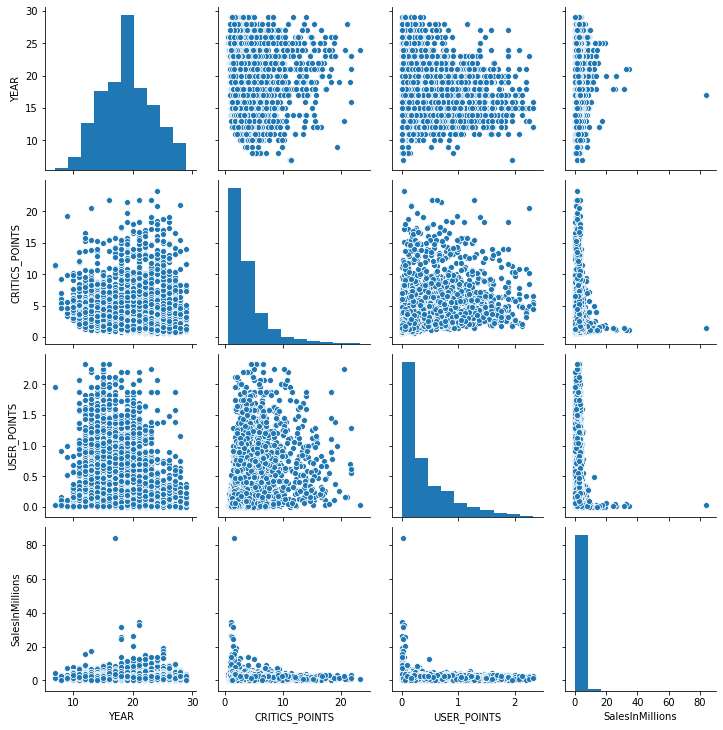

In [13]:
sns.pairplot(df)

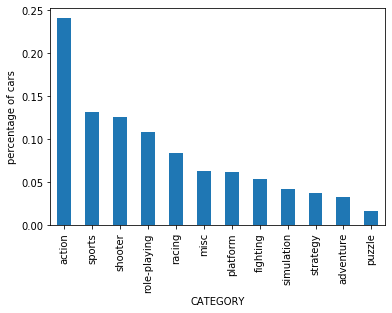

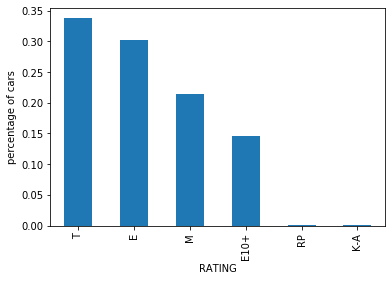

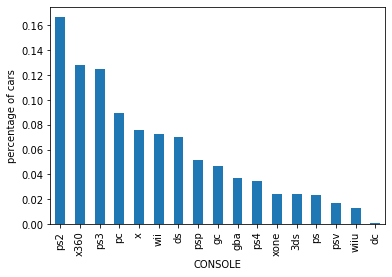

In [80]:
total_pubs = len(df)

for col in ['CATEGORY', 'RATING', 'CONSOLE']:
    # count the number of observations per label and divide by total 
    # number of cars
    temp_df = pd.Series(df[col].value_counts() / total_pubs)
    
    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    fig.set_ylabel('percentage of cars')
    plt.show()

In [92]:
c = pd.Series(df['PUBLISHER'].value_counts() / total_pubs)

In [93]:
grouping_dict = {
    k: ('rare' if k not in c[c >= 0.01426126640045636].index else k)
    for k in c.index
}

grouping_dict

{'Electronic Arts': 'Electronic Arts',
 'Activision': 'Activision',
 'Ubisoft': 'Ubisoft',
 'Nintendo': 'Nintendo',
 'Thq': 'Thq',
 'Sony Computer Entertainment': 'Sony Computer Entertainment',
 'Take-Two Interactive': 'Take-Two Interactive',
 'Sega': 'Sega',
 'Konami Digital Entertainment': 'Konami Digital Entertainment',
 'Namco Bandai Games': 'Namco Bandai Games',
 'Atari': 'Atari',
 'Microsoft Game Studios': 'Microsoft Game Studios',
 'Warner Bros. Interactive Entertainment': 'Warner Bros. Interactive Entertainment',
 'Capcom': 'Capcom',
 'Square Enix': 'Square Enix',
 'Tecmo Koei': 'Tecmo Koei',
 'Midway Games': 'Midway Games',
 'Vivendi Games': 'Vivendi Games',
 'Eidos Interactive': 'Eidos Interactive',
 'Codemasters': 'Codemasters',
 'Disney Interactive Studios': 'rare',
 'Lucasarts': 'rare',
 '505 Games': 'rare',
 'Acclaim Entertainment': 'rare',
 'Deep Silver': 'rare',
 'Nippon Ichi Software': 'rare',
 'Rising Star Games': 'rare',
 'Bethesda Softworks': 'rare',
 'Atlus': 'rare

In [34]:
df.PUBLISHER.value_counts().sort_values(ascending=False).head(60)

Electronic Arts                           497
Activision                                289
Ubisoft                                   250
Nintendo                                  185
Thq                                       173
Sony Computer Entertainment               159
Take-Two Interactive                      136
Sega                                      134
Konami Digital Entertainment              111
Namco Bandai Games                        108
Microsoft Game Studios                     86
Atari                                      86
Warner Bros. Interactive Entertainment     85
Capcom                                     79
Square Enix                                70
Tecmo Koei                                 66
Midway Games                               58
Vivendi Games                              57
Eidos Interactive                          55
Codemasters                                50
Disney Interactive Studios                 41
Lucasarts                         

In [94]:
df['PUB_grouped'] = df['PUBLISHER'].map(grouping_dict)
df[['PUBLISHER', 'PUB_grouped']].head(10)

,PUBLISHER,PUB_grouped
0,Nintendo,Nintendo
1,Konami Digital Entertainment,Konami Digital Entertainment
2,Activision,Activision
3,Electronic Arts,Electronic Arts
4,Activision,Activision
5,Sony Computer Entertainment,Sony Computer Entertainment
6,Idea Factory,rare
7,Atari,Atari
8,Empire Interactive,rare
9,Sony Computer Entertainment,Sony Computer Entertainment


In [85]:
cols_to_use = ['RATING', 'CONSOLE', 'CATEGORY']

In [67]:
df.head()

,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions,PUB_grouped
0,ds,18,role-playing,Nintendo,E,2.833333,0.303704,1.779257,Nintendo
1,wii,22,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050,Konami Digital Entertainment
2,pc,29,shooter,Activision,M,4.562500,0.006410,0.534402,Activision
3,ps2,12,sports,Electronic Arts,E,4.181818,0.326923,1.383964,Electronic Arts
4,ps3,23,action,Activision,M,2.259259,0.032579,0.082671,Activision


In [53]:
len(df)

3506

In [71]:
df['RATING'].value_counts()

T       1182
E       1061
M        749
E10+     511
RP         2
K-A        1
Name: RATING, dtype: int64

In [90]:
for col in cols_to_use:
    
    # calculate the % of cars in each category
    temp_df1 = pd.Series(df[col].value_counts() / len(df))

    # create a dictionary to replace the rare labels with the
    # string 'rare'
    grouping_dict1 = {
        k: ('rare' if k not in temp_df1[temp_df1 >= 0.02852253280091272].index else k)
        for k in temp_df1.index
    }
    
    # replace the rare labels
    df[col + '_grouped'] = df[col].map(grouping_dict1)

df.head()

,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions,RATING_grouped,CONSOLE_grouped,CATEGORY_grouped
0,ds,18,role-playing,Nintendo,E,2.833333,0.303704,1.779257,E,ds,role-playing
1,wii,22,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050,E10+,wii,simulation
2,pc,29,shooter,Activision,M,4.562500,0.006410,0.534402,M,pc,shooter
3,ps2,12,sports,Electronic Arts,E,4.181818,0.326923,1.383964,E,ps2,sports
4,ps3,23,action,Activision,M,2.259259,0.032579,0.082671,M,ps3,action


In [97]:
df = df.drop(['CATEGORY', 'PUBLISHER', 'CONSOLE', 'RATING'], 1)

In [98]:
df.head()

,YEAR,CRITICS_POINTS,USER_POINTS,SalesInMillions,RATING_grouped,CONSOLE_grouped,CATEGORY_grouped,PUB_grouped
0,18,2.833333,0.303704,1.779257,E,ds,role-playing,Nintendo
1,22,13.200000,1.640000,0.215050,E10+,wii,simulation,Konami Digital Entertainment
2,29,4.562500,0.006410,0.534402,M,pc,shooter,Activision
3,12,4.181818,0.326923,1.383964,E,ps2,sports,Electronic Arts
4,23,2.259259,0.032579,0.082671,M,ps3,action,Activision


In [100]:
from sklearn import preprocessing

In [102]:
le = preprocessing.LabelEncoder()
le.fit(df['RATING_grouped'])
df['RATING'] = le.transform(df['RATING_grouped'])

LabelEncoder()

In [107]:
df1 = pd.get_dummies(df,columns = [ 'CONSOLE_grouped', 'CATEGORY_grouped', 'PUB_grouped'], drop_first=True)

In [114]:
df1 = df1.drop(['RATING_grouped'], 1)

In [109]:
df1.shape

(3506, 48)

In [115]:
X = df1.drop(['SalesInMillions'], 1)
Y = df1['SalesInMillions']

In [118]:
X.head()

,YEAR,CRITICS_POINTS,USER_POINTS,RATING,CONSOLE_grouped_gba,CONSOLE_grouped_gc,CONSOLE_grouped_pc,CONSOLE_grouped_ps2,CONSOLE_grouped_ps3,CONSOLE_grouped_ps4,...,PUB_grouped_Sega,PUB_grouped_Sony Computer Entertainment,PUB_grouped_Square Enix,PUB_grouped_Take-Two Interactive,PUB_grouped_Tecmo Koei,PUB_grouped_Thq,PUB_grouped_Ubisoft,PUB_grouped_Vivendi Games,PUB_grouped_Warner Bros. Interactive Entertainment,PUB_grouped_rare
0,18,2.833333,0.303704,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22,13.200000,1.640000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29,4.562500,0.006410,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,4.181818,0.326923,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,2.259259,0.032579,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
Y.head()

0    1.779257
1    0.215050
2    0.534402
3    1.383964
4    0.082671
Name: SalesInMillions, dtype: float64

In [120]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [121]:
print(model.feature_importances_)

[0.09541521 0.09098594 0.25293708 0.03791053 0.00415226 0.00503273
 0.01539662 0.00874591 0.00758406 0.00466868 0.00343363 0.01861218
 0.05217066 0.00267783 0.01100755 0.00368841 0.00618829 0.00874769
 0.0123091  0.05142213 0.00111547 0.00783925 0.00766922 0.00620433
 0.1609621  0.00413106 0.00176711 0.00699312 0.00105344 0.00135396
 0.00830085 0.00318974 0.00793888 0.00116916 0.00252133 0.03831434
 0.00339886 0.0061843  0.00158778 0.0122545  0.00104637 0.00196681
 0.00708633 0.00176972 0.00147305 0.00962245]


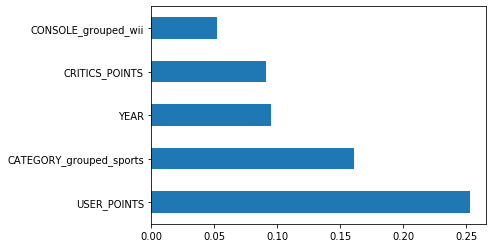

In [122]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [123]:
df_test = pd.read_csv(r'C:\Users\asus\Desktop\Kaggle datset\Books dataset\Test.csv')

In [124]:
df_test.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS
0,4310,ps2,2008,action,Tecmo Koei,T,3.928571,0.482353
1,4011,psp,2007,strategy,Atari,E10+,5.538462,0.071795
2,2185,ps2,2004,shooter,Electronic Arts,T,3.034483,0.062044
3,1644,x,2006,action,Electronic Arts,E,2.913043,0.880000
4,188,3ds,2011,racing,Ubisoft,E10+,1.162162,0.183333


In [125]:
df_test.isnull().sum().sort_values(ascending=False)

USER_POINTS       0
CRITICS_POINTS    0
RATING            0
PUBLISHER         0
CATEGORY          0
YEAR              0
CONSOLE           0
ID                0
dtype: int64

In [126]:
df_test = df_test.drop(['ID'], 1)

In [148]:
df2 = df_test.copy()
df2['YEAR'] = df2['YEAR'] - 1990

In [149]:
c3 = pd.Series(df2['PUBLISHER'].value_counts() / len(df2))
grouping_dict3 = {
    k: ('rare' if k not in c3[c3 >= 0.01426126640045636].index else k)
    for k in c3.index
}

grouping_dict3

{'Electronic Arts': 'Electronic Arts',
 'Activision': 'Activision',
 'Ubisoft': 'Ubisoft',
 'Sony Computer Entertainment': 'Sony Computer Entertainment',
 'Take-Two Interactive': 'Take-Two Interactive',
 'Nintendo': 'Nintendo',
 'Thq': 'Thq',
 'Sega': 'Sega',
 'Namco Bandai Games': 'Namco Bandai Games',
 'Konami Digital Entertainment': 'Konami Digital Entertainment',
 'Atari': 'Atari',
 'Capcom': 'Capcom',
 'Eidos Interactive': 'Eidos Interactive',
 'Square Enix': 'Square Enix',
 'Vivendi Games': 'Vivendi Games',
 'Warner Bros. Interactive Entertainment': 'Warner Bros. Interactive Entertainment',
 'Tecmo Koei': 'Tecmo Koei',
 'Lucasarts': 'Lucasarts',
 'Codemasters': 'Codemasters',
 'Microsoft Game Studios': 'rare',
 'Deep Silver': 'rare',
 'Midway Games': 'rare',
 '505 Games': 'rare',
 'Acclaim Entertainment': 'rare',
 'Disney Interactive Studios': 'rare',
 'Nippon Ichi Software': 'rare',
 'Bethesda Softworks': 'rare',
 'Focus Home Interactive': 'rare',
 'Ignition Entertainment': 'rar

In [150]:
df2['PUB_grouped'] = df2['PUBLISHER'].map(grouping_dict)

In [151]:
df2.head()

,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,PUB_grouped
0,ps2,18,action,Tecmo Koei,T,3.928571,0.482353,Tecmo Koei
1,psp,17,strategy,Atari,E10+,5.538462,0.071795,Atari
2,ps2,14,shooter,Electronic Arts,T,3.034483,0.062044,Electronic Arts
3,x,16,action,Electronic Arts,E,2.913043,0.880000,Electronic Arts
4,3ds,21,racing,Ubisoft,E10+,1.162162,0.183333,Ubisoft


In [152]:
cols_to_use = ['RATING', 'CONSOLE', 'CATEGORY']

In [153]:
for col in cols_to_use:
    
    # calculate the % of cars in each category
    temp_df1 = pd.Series(df2[col].value_counts() / len(df2))

    # create a dictionary to replace the rare labels with the
    # string 'rare'
    grouping_dict1 = {
        k: ('rare' if k not in temp_df1[temp_df1 >= 0.02852253280091272].index else k)
        for k in temp_df1.index
    }
    
    # replace the rare labels
    df2[col + '_grouped'] = df2[col].map(grouping_dict1)

df2.head()

,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,PUB_grouped,RATING_grouped,CONSOLE_grouped,CATEGORY_grouped
0,ps2,18,action,Tecmo Koei,T,3.928571,0.482353,Tecmo Koei,T,ps2,action
1,psp,17,strategy,Atari,E10+,5.538462,0.071795,Atari,E10+,psp,strategy
2,ps2,14,shooter,Electronic Arts,T,3.034483,0.062044,Electronic Arts,T,ps2,shooter
3,x,16,action,Electronic Arts,E,2.913043,0.880000,Electronic Arts,E,x,action
4,3ds,21,racing,Ubisoft,E10+,1.162162,0.183333,Ubisoft,E10+,rare,racing


In [154]:
df2 = df2.drop(['CONSOLE', 'CATEGORY', 'PUBLISHER', 'RATING'], 1)

In [200]:
df2.head()

,YEAR,CRITICS_POINTS,USER_POINTS,PUB_grouped,RATING_grouped,CONSOLE_grouped,CATEGORY_grouped,RATING
0,18,3.928571,0.482353,Tecmo Koei,T,ps2,action,3
1,17,5.538462,0.071795,Atari,E10+,psp,strategy,1
2,14,3.034483,0.062044,Electronic Arts,T,ps2,shooter,3
3,16,2.913043,0.880000,Electronic Arts,E,x,action,0
4,21,1.162162,0.183333,Ubisoft,E10+,rare,racing,1


In [156]:
le.fit(df2['RATING_grouped'])
df2['RATING'] = le.transform(df2['RATING_grouped'])

In [201]:
df2 = pd.get_dummies(df2,columns = [ 'CONSOLE_grouped', 'CATEGORY_grouped', 'PUB_grouped'], drop_first=True)

In [203]:
df2 = df2.drop(['RATING_grouped'], 1)

In [204]:
df2.head()

,YEAR,CRITICS_POINTS,USER_POINTS,RATING,CONSOLE_grouped_gc,CONSOLE_grouped_pc,CONSOLE_grouped_ps2,CONSOLE_grouped_ps3,CONSOLE_grouped_ps4,CONSOLE_grouped_psp,...,PUB_grouped_Sega,PUB_grouped_Sony Computer Entertainment,PUB_grouped_Square Enix,PUB_grouped_Take-Two Interactive,PUB_grouped_Tecmo Koei,PUB_grouped_Thq,PUB_grouped_Ubisoft,PUB_grouped_Vivendi Games,PUB_grouped_Warner Bros. Interactive Entertainment,PUB_grouped_rare
0,18,3.928571,0.482353,3,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,17,5.538462,0.071795,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,14,3.034483,0.062044,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,2.913043,0.880000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,1.162162,0.183333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [215]:
X_train = X.drop(['PUB_grouped_Microsoft Game Studios', 'CONSOLE_grouped_gba'], 1)

In [217]:
X_train.shape

(3506, 44)

In [219]:
X_test = df2.copy()

In [209]:
X_test.shape

(1503, 44)

In [189]:
from sklearn.ensemble import RandomForestRegressor

In [190]:
regressor=RandomForestRegressor()

In [191]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [192]:
from sklearn.model_selection import RandomizedSearchCV

In [193]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [194]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [195]:
rf = RandomForestRegressor()

In [196]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [221]:
rf_random.fit(X_train,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   7.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [222]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [223]:
y_pred=rf_random.predict(X_test)

In [226]:
y_test = pd.read_csv(r'C:\Users\asus\Desktop\Kaggle datset\Books dataset\Sample_Submission.csv')

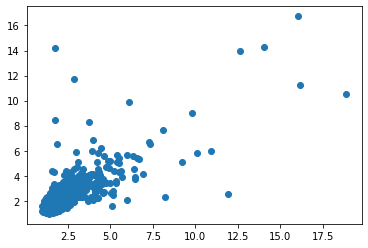

In [228]:
plt.scatter(y_test, y_pred)

In [230]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.38856457083170576
MSE: 0.6717302562621777
RMSE: 0.8195915179296195


In [231]:
y_test

,SalesInMillions
0,1.497533
1,2.368795
2,2.630505
3,2.506086
4,1.970574
...,...
1498,2.456946
1499,1.222738
1500,1.591085
1501,1.805565


In [232]:
y_pred

array([1.69096589, 2.14437629, 3.83988626, ..., 1.67521622, 2.03574953,
       2.39511751])